In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/yellow_tripdata_2015-05.csv", nrows=30000)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2015-05-05 23:37:40,2015-05-05 23:45:41,1,2.00,-74.001678,40.739311,1,N,-73.978294,40.752110,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80
1,2,2015-05-05 23:37:40,2015-05-05 23:40:36,1,0.54,-73.930840,40.744789,1,N,-73.937515,40.749359,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
2,2,2015-05-05 23:37:40,2015-05-05 23:44:03,3,2.10,-74.001411,40.731087,1,N,-73.981674,40.758282,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
3,2,2015-05-05 23:37:40,2015-05-06 00:14:01,6,10.93,-73.970673,40.758560,1,N,-73.933762,40.670544,1,36.0,0.5,0.5,9.32,0.0,0.3,46.62
4,2,2015-05-05 23:37:40,2015-05-05 23:46:03,5,0.93,-73.986732,40.755878,1,N,-73.990959,40.749981,1,7.0,0.5,0.5,2.49,0.0,0.3,10.79


In [3]:
points = df.apply(lambda row: Point(float(row["dropoff_longitude"]), float(row["dropoff_latitude"])), axis=1)
points.size

30000

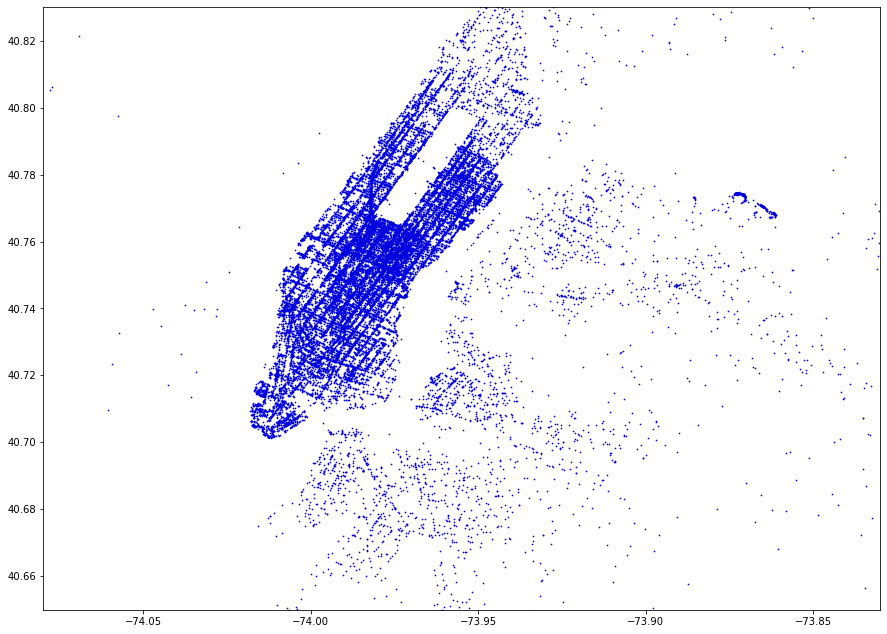

In [4]:
taxis = gpd.GeoDataFrame(df, geometry=points)
taxis.crs = {'init':'epsg:5471'} 
carte = taxis.plot(figsize=(15,15), marker='o', color='#0101DF', markersize=0.5)
carte.set_xlim([-74.08,-73.83])
carte.set_ylim([40.65,40.83])
plt.savefig('taxisNYC.png', dpi=300)